# Projet - Python for Data Analysis
#### Thomas Vaquero - ESILV A5

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sn
from matplotlib.cm import ScalarMappable
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_moons
import warnings
from sklearn.datasets import load_digits
from sklearn import svm

In [2]:
warnings.filterwarnings("ignore")

# Classification sans pré-processing

#### 1. Lecture du CSV : on importe le fichier X_train et X_test dans deux data frames

In [3]:
df_train = pd.read_csv('Train/X_train.txt', sep = " ", header = None)
df_train.head(6)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,0.074999,-0.554902,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326


In [4]:
all_scores = []
names = ['ClassifierTree', 'RandomForest', 'LSVM']


In [5]:
f = open('Train/y_train.txt', 'r')
y_train_file = f.readlines() #on met le contenu de y_train dans y_train_file
f.close

<function TextIOWrapper.close()>

In [6]:
classification = list(map(lambda x:x.strip(), y_train_file))
df_train['Class'] = classification #on ajoute une colonne à notre dataframe 
df_train.head(2) #on vérifie l'ajout 

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,Class
0,0.04358,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.03948,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5


In [7]:
df_test = pd.read_csv('Test/X_test.txt', sep = " ", header = None)
f = open('Test/y_test.txt', 'r')
X_test_file = f.readlines() #on met le contenu de X_test dans X_test_file
f.close
classification = list(map(lambda x:x.strip(), X_test_file))
df_test['Class'] = classification #on ajoute une colonne à notre dataframe 
df_test.head(2) #on vérifie l'ajout 
df_test.shape

(3162, 562)

#### 2. Elaboration des modèles de classification sans pré-processing
#### On effectue successivement: 
   #### - Un Decision Tree
   #### - Un Random Forest
   #### - Un Linear SVM

In [8]:
x_train = df_train.drop('Class', axis = 1)
y_train = df_train['Class']
x_test = df_test.drop('Class', axis = 1)
y_test = df_test['Class']



In [9]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
y_hat = classifier.predict(x_test)
score_tree = classifier.score(x_test, y_test)
all_scores.append(score_tree)


In [11]:
print(classification_report(y_test, y_hat))
print(score_tree)

              precision    recall  f1-score   support

           1       0.81      0.76      0.78       496
          10       0.59      0.64      0.62        25
          11       0.60      0.63      0.61        49
          12       0.61      0.52      0.56        27
           2       0.66      0.76      0.71       471
           3       0.82      0.74      0.78       420
           4       0.84      0.80      0.82       508
           5       0.83      0.86      0.85       556
           6       0.99      0.99      0.99       545
           7       0.52      0.65      0.58        23
           8       0.80      0.80      0.80        10
           9       0.64      0.56      0.60        32

    accuracy                           0.82      3162
   macro avg       0.73      0.73      0.73      3162
weighted avg       0.82      0.82      0.82      3162

0.8153067678684377


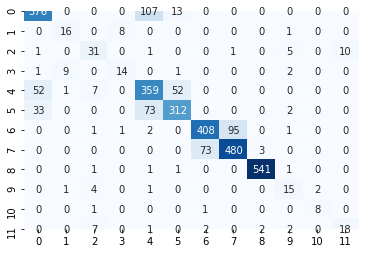

In [12]:
sn.heatmap(confusion_matrix(y_test, y_hat),annot=True,cmap = plt.cm.Blues, cbar=False, fmt = 'g') 
plt.show()

In [13]:
RFC = RandomForestClassifier()
RFC_CLF = RFC.fit(x_train, y_train)
RFC_hat = RFC_CLF.predict(x_test)

In [14]:
print(classification_report(y_test, RFC_hat))
RFC_score = RFC_CLF.score(x_test, y_test)
all_scores.append(RFC_score)
print(RFC_score)

              precision    recall  f1-score   support

           1       0.82      0.95      0.88       496
          10       0.67      0.80      0.73        25
          11       0.58      0.59      0.59        49
          12       0.70      0.52      0.60        27
           2       0.85      0.83      0.84       471
           3       0.95      0.81      0.88       420
           4       0.85      0.88      0.87       508
           5       0.88      0.87      0.88       556
           6       1.00      1.00      1.00       545
           7       0.65      0.48      0.55        23
           8       1.00      0.80      0.89        10
           9       0.67      0.62      0.65        32

    accuracy                           0.88      3162
   macro avg       0.80      0.76      0.78      3162
weighted avg       0.88      0.88      0.88      3162

0.8788741302972802


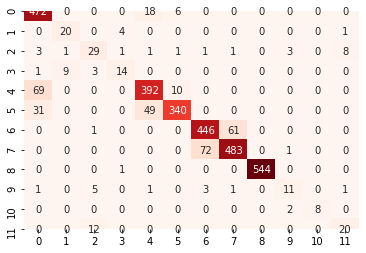

In [15]:
sn.heatmap(confusion_matrix(y_test, RFC_hat), annot=True, cmap = plt.cm.Reds, cbar=False, fmt = 'g') 
plt.show()

In [16]:
lsvm = sklearn.svm.SVC(kernel = 'linear')
lsvm_CLF = lsvm.fit(x_train, y_train)

In [17]:
lsvm_predict = lsvm_CLF.predict(x_test)
score_lsvm = lsvm_CLF.score(x_test, y_test)
all_scores.append(score_lsvm)


In [18]:
print(classification_report(y_test, lsvm_predict))
print(score_lsvm)

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
          10       0.72      0.72      0.72        25
          11       0.69      0.67      0.68        49
          12       0.72      0.67      0.69        27
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       1.00      0.78      0.88        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32

    accuracy                           0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162

0.9522454142947502


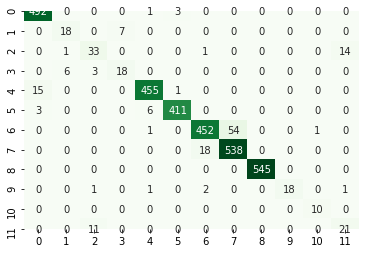

In [19]:
sn.heatmap(confusion_matrix(y_test, lsvm_predict), annot=True, cmap = plt.cm.Greens, cbar=False, fmt = 'g') 
plt.show()

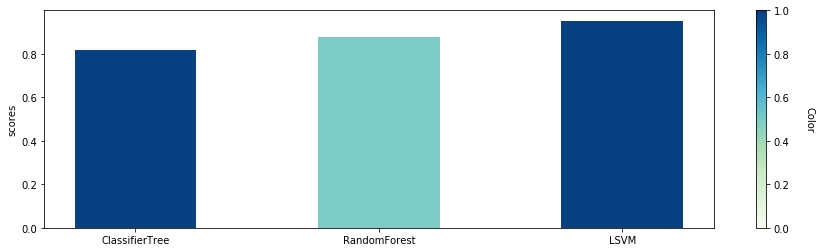

In [20]:
data_color = [1000.,500.,1000.,900.]
data_color = [x / max(data_color) for x in data_color]
fig, ax = plt.subplots(figsize = (15, 4))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(names, all_scores, color = colors, width = 0.5)

sm = ScalarMappable(cmap = my_cmap, norm = plt.Normalize(0,max(data_color)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(names)    
plt.ylabel("scores")

plt.show()

# Pré-processing des données

#### L'objectif est de retirer certaines colonnes pour améliorer la précision des modèles. Nous allons faire varier la variance dans une range défini et supprimer les colonnes dont la variance est inférieure à la clef du range. Nous allons ensuite executer les algorithmes avec les différents dataframe obtenus et comparer les précisions

#### 1. Classifier Tree

In [24]:
rates1 = [0.015, 0.025, 0.05, 0.1, 0.5]
scores1 = []

for r in rates1:
    df_temp1 = df_test.copy()
    df_temp2 = df_train.copy()
    var = df_temp2.var() < r
    
    datas_to_clear = []
    for i in range(len(var)):
        if var[i] == True:
            datas_to_clear.append(i)
    for elt in datas_to_clear:
        del var[elt]
                
    df_test_temp_cpy = df_temp1.copy()
    df_train_temp_cpy = df_temp2.copy()
    
    df_test_temp_cpy = df_temp1.drop(columns = datas_to_clear, axis=1)
    df_train_temp_cpy = df_temp2.drop(columns = datas_to_clear, axis=1)
    
    
    x_train_temp = df_train_temp_cpy.drop('Class', axis = 1)
    y_train_temp = df_train_temp_cpy['Class']
    x_test_temp = df_test_temp_cpy.drop('Class', axis = 1)
    y_test_temp = df_test_temp_cpy['Class']
    
    classifier_temp = DecisionTreeClassifier()
    classifier_temp.fit(x_train_temp, y_train_temp)

    y_hat_temp = classifier_temp.predict(x_test_temp)
    score_tree_temp = classifier_temp.score(x_test_temp, y_test_temp)
    scores1.append(score_tree_temp)


In [27]:
rates2 = [0.015, 0.025, 0.05, 0.1, 0.5]
scores2 = []

for r in rates2:
    df_temp1 = df_test.copy()
    df_temp2 = df_train.copy()
    var = df_temp2.std() < r
    
    datas_to_clear = []
    for i in range(len(var)):
        if var[i] == True:
            datas_to_clear.append(i)
    for elt in datas_to_clear:
        del var[elt]
                
    df_test_temp_cpy = df_temp1.copy()
    df_train_temp_cpy = df_temp2.copy()
    
    df_test_temp_cpy = df_temp1.drop(columns = datas_to_clear, axis=1)
    df_train_temp_cpy = df_temp2.drop(columns = datas_to_clear, axis=1)
    
    
    x_train_temp = df_train_temp_cpy.drop('Class', axis = 1)
    y_train_temp = df_train_temp_cpy['Class']
    x_test_temp = df_test_temp_cpy.drop('Class', axis = 1)
    y_test_temp = df_test_temp_cpy['Class']
    
    classifier_temp = DecisionTreeClassifier()
    classifier_temp.fit(x_train_temp, y_train_temp)

    y_hat_temp = classifier_temp.predict(x_test_temp)
    score_tree_temp = classifier_temp.score(x_test_temp, y_test_temp)
    scores2.append(score_tree_temp)


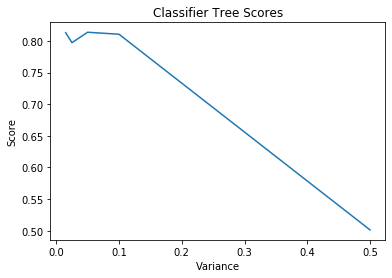

In [25]:
#Plot variance
plt.plot(rates1, scores1)
plt.xlabel('Variance')
plt.ylabel('Score')
plt.title('Classifier Tree Scores')
plt.show()

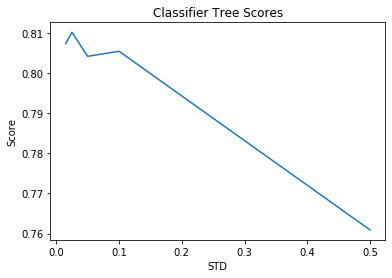

In [28]:
#Plot STD
plt.plot(rates2, scores2)
plt.xlabel('STD')
plt.ylabel('Score')
plt.title('Classifier Tree Scores')
plt.show()

#### 2. Random Forest

In [ ]:
rates = [0.015, 0.025, 0.05, 0.1, 0.5]
scores = []

for r in rates:
    df_temp1 = df_test.copy()
    df_temp2 = df_train.copy()
    var = df_temp2.var() < r
    
    datas_to_clear = []
    for i in range(len(var)):
        if var[i] == True:
            datas_to_clear.append(i)
    for elt in datas_to_clear:
        del var[elt]
                
    df_test_temp_cpy = df_temp1.copy()
    df_train_temp_cpy = df_temp2.copy()
    
    df_test_temp_cpy = df_temp1.drop(columns = datas_to_clear, axis=1)
    df_train_temp_cpy = df_temp2.drop(columns = datas_to_clear, axis=1)
    
    
    x_train_temp = df_train_temp_cpy.drop('Class', axis = 1)
    y_train_temp = df_train_temp_cpy['Class']
    x_test_temp = df_test_temp_cpy.drop('Class', axis = 1)
    y_test_temp = df_test_temp_cpy['Class']
    
    RFC_temp = RandomForestClassifier()
    RFC_CLF_temp = RFC_temp.fit(x_train_temp, y_train_temp)
    RFC_hat_temp = RFC_CLF_temp.predict(x_test_temp)

    RFC_score_temp = RFC_CLF_temp.score(x_test_temp, y_test_temp)
    scores.append(RFC_score_temp)
    
plt.plot(rates, scores)
plt.xlabel('Variance')
plt.ylabel('Score')
plt.title('Random Forest Scores')
plt.show()

#### 3. LSVM

In [ ]:
rates = [0.015, 0.025, 0.05, 0.1, 0.5]
scores = []

for r in rates:
    df_temp1 = df_test.copy()
    df_temp2 = df_train.copy()
    var = df_temp2.var() < r
    
    datas_to_clear = []
    for i in range(len(var)):
        if var[i] == True:
            datas_to_clear.append(i)
    for elt in datas_to_clear:
        del var[elt]
                
    df_test_temp_cpy = df_temp1.copy()
    df_train_temp_cpy = df_temp2.copy()
    
    df_test_temp_cpy = df_temp1.drop(columns = datas_to_clear, axis=1)
    df_train_temp_cpy = df_temp2.drop(columns = datas_to_clear, axis=1)
    
    
    x_train_temp = df_train_temp_cpy.drop('Class', axis = 1)
    y_train_temp = df_train_temp_cpy['Class']
    x_test_temp = df_test_temp_cpy.drop('Class', axis = 1)
    y_test_temp = df_test_temp_cpy['Class']
    
    lsvm_temp = sklearn.svm.SVC(kernel = 'linear')
    lsvm_CLF_temp = lsvm_temp.fit(x_train_temp, y_train_temp)

    lsvm_predict_temp = lsvm_CLF_temp.predict(x_test_temp)
    score_lsvm_temp = lsvm_CLF_temp.score(x_test_temp, y_test_temp)
    scores.append(score_lsvm_temp)
    
plt.plot(rates, scores)
plt.xlabel('Variance')
plt.ylabel('Score')
plt.title('LSVM Scores')
plt.show()

#### On observe pour chaque modèle une baisse significative de la précision à partir d'une variance à 0.1

#### Variation des hyper paramètres

In [34]:
hyperparametres_possibles = {
    'C'     : [0.5, 1, 1.5],
    'gamma' :[0.5, 0.1, 0.15]
}
grid = GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1, cv=10, verbose=2)


In [35]:
grid.fit(x_train, y_train)



Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 20.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'gamma': [0.5, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [36]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '